In [72]:
import numpy as np
from scipy import stats
from scipy.fft import fft
import matplotlib.pyplot as plt
import pandas as pd

In [73]:
dateDF = pd.read_excel("DSP_Data_with_Butas and date.xlsx", "Sheet1", skiprows=0, nrows= 1350, usecols="A")

dateDF['Date'] = dateDF['Date']

dateDF

Date
0     10/17/2023_20:26:35
1     10/17/2023_20:41:37
2     10/17/2023_20:56:40
3     10/17/2023_21:11:43
4     10/17/2023_21:26:46
...                   ...
1343  10/31/2023_23:20:31
1344  10/31/2023_23:35:34
1345  10/31/2023_23:50:37
1346  11/01/2023_00:05:40
1347  11/01/2023_00:20:42

[1348 rows x 1 columns]

In [74]:
humiDF = pd.read_excel("DSP_Data_with_Butas and date.xlsx", "Sheet1", skiprows=0, nrows= 1350, usecols="B")

humiDF['Humidity (%)'] = humiDF['Humidity (%)'].interpolate()

humiDF

Humidity (%)
0             66.1
1             66.0
2             61.1
3             59.5
4             61.5
...            ...
1343          48.7
1344          47.3
1345          46.8
1346          47.2
1347          47.2

[1348 rows x 1 columns]

In [75]:
tempDF = pd.read_excel("DSP_Data_with_Butas and date.xlsx", "Sheet1", skiprows=0, nrows= 1350, usecols="C")

tempDF['Temperature (°C)'] = tempDF['Temperature (°C)'].interpolate()

tempDF

Temperature (°C)
0                 32.6
1                 32.6
2                 34.8
3                 35.2
4                 33.7
...                ...
1343              33.1
1344              34.8
1345              34.9
1346              35.0
1347              34.8

[1348 rows x 1 columns]

In [76]:
datetemphumiDF = pd.DataFrame()

datetemphumiDF = pd.concat([dateDF, humiDF, tempDF], axis=1)

datetemphumiDF

Date  Humidity (%)  Temperature (°C)
0     10/17/2023_20:26:35          66.1              32.6
1     10/17/2023_20:41:37          66.0              32.6
2     10/17/2023_20:56:40          61.1              34.8
3     10/17/2023_21:11:43          59.5              35.2
4     10/17/2023_21:26:46          61.5              33.7
...                   ...           ...               ...
1343  10/31/2023_23:20:31          48.7              33.1
1344  10/31/2023_23:35:34          47.3              34.8
1345  10/31/2023_23:50:37          46.8              34.9
1346  11/01/2023_00:05:40          47.2              35.0
1347  11/01/2023_00:20:42          47.2              34.8

[1348 rows x 3 columns]

In [77]:
datetemphumiDF[['Month', 'Day', 'Year']] = datetemphumiDF['Date'].str.split('/', expand=True)

In [125]:
datetemphumiDF['Date'] = pd.to_datetime(datetemphumiDF['Date'], format='%m/%d/%Y_%H:%M:%S')
datetemphumiDF['Time'] = datetemphumiDF['Date'].dt.time
Monday_23 = datetemphumiDF[datetemphumiDF['Day'] == '23']
Monday_30 = datetemphumiDF[datetemphumiDF['Day'] == '30']
print("Monday 23")
print(Monday_23[['Time', 'Temperature (°C)', 'Humidity (%)']])

print("Monday 30")
print(Monday_30[['Time', 'Temperature (°C)', 'Humidity (%)']])

Monday 23
         Time  Temperature (°C)  Humidity (%)
485  00:09:10              30.6          72.8
486  00:24:12              31.1          73.8
487  00:39:15              30.4          73.9
488  00:54:18              29.9          76.0
489  01:09:21              30.7          75.5
..        ...               ...           ...
576  22:58:34              31.5          70.2
577  23:13:37              31.6          69.9
578  23:28:41              31.5          69.6
579  23:43:44              31.3          69.5
580  23:58:47              30.3          72.5

[96 rows x 3 columns]
Monday 30
          Time  Temperature (°C)  Humidity (%)
1155  00:11:32              33.3          51.8
1156  00:26:34              32.5          58.2
1157  00:41:38              32.3          62.2
1158  00:56:41              32.2          64.0
1159  01:11:44              32.5          63.4
...        ...               ...           ...
1245  22:45:54              33.8          56.3
1246  23:00:57              3

In [126]:
Monday = datetemphumiDF[(datetemphumiDF['Day'] == '23') | (datetemphumiDF['Day'] == '30')]

print("Monday")
print(Monday)


Monday
                    Date  Humidity (%)  Temperature (°C) Month Day  \
485  2023-10-23 00:09:10          72.8              30.6    10  23   
486  2023-10-23 00:24:12          73.8              31.1    10  23   
487  2023-10-23 00:39:15          73.9              30.4    10  23   
488  2023-10-23 00:54:18          76.0              29.9    10  23   
489  2023-10-23 01:09:21          75.5              30.7    10  23   
...                  ...           ...               ...   ...  ..   
1245 2023-10-30 22:45:54          56.3              33.8    10  30   
1246 2023-10-30 23:00:57          56.2              32.8    10  30   
1247 2023-10-30 23:15:59          57.8              33.8    10  30   
1248 2023-10-30 23:31:02          58.5              33.7    10  30   
1249 2023-10-30 23:46:05          59.8              32.6    10  30   

               Year      Time  
485   2023_00:09:10  00:09:10  
486   2023_00:24:12  00:24:12  
487   2023_00:39:15  00:39:15  
488   2023_00:54:18  00:

In [118]:
Monday_temperatures = Monday['Temperature (°C)']

mean_temperature = Monday_temperatures.mean()
median_temperature = Monday_temperatures.median()
mode_temperature = Monday_temperatures.mode().values[0]

temperature_statistics_df = pd.DataFrame({
    'Metric': ['Mean Temperature', 'Median Temperature', 'Mode Temperature'],
    'Value': [mean_temperature, median_temperature, mode_temperature]
})
print(temperature_statistics_df)

               Metric     Value
0    Mean Temperature  32.50733
1  Median Temperature  31.70000
2    Mode Temperature  30.40000


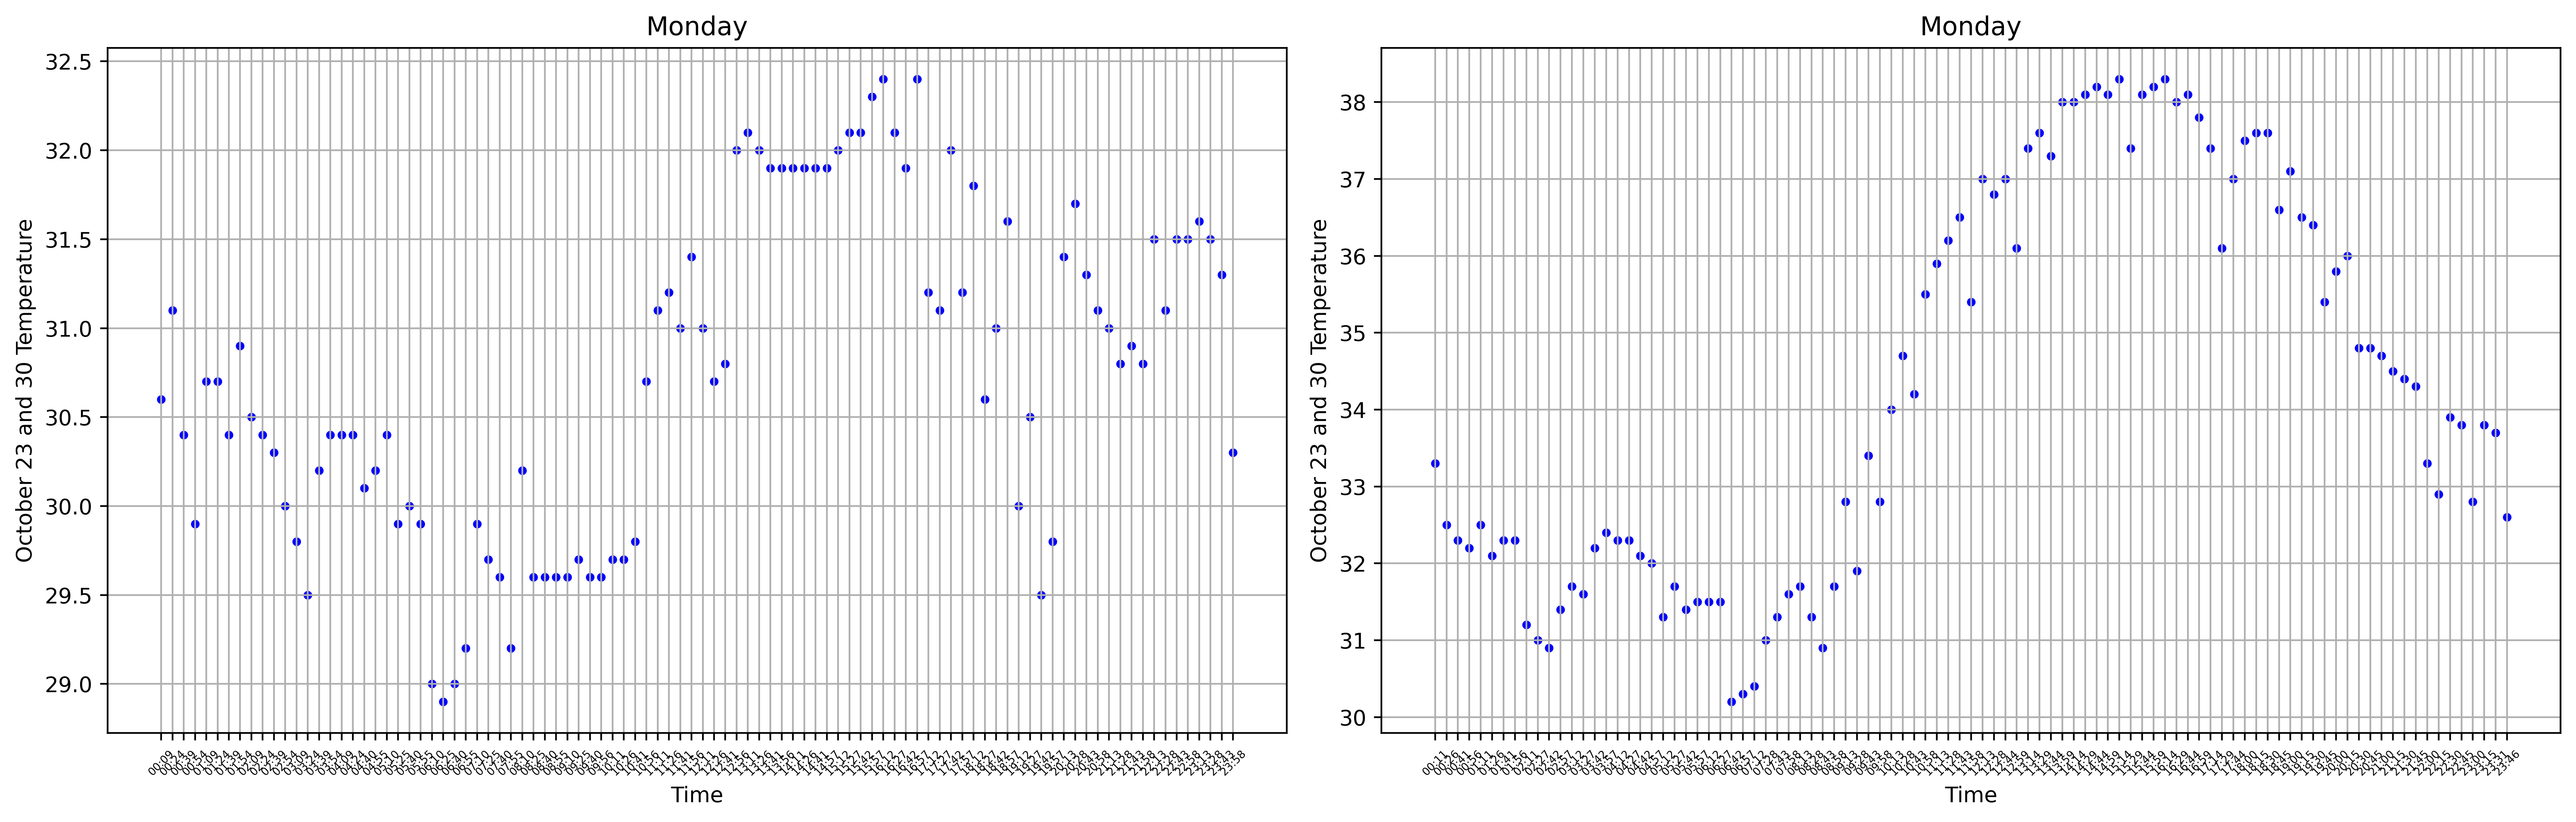

In [119]:
Monday_temperatures = [Monday_23, Monday_30] 
plt.figure(figsize=(25, 10), dpi=500)
position = 1
tempIndex = 0

for MondayComb in Monday_temperatures:
    plt.subplot(2, 3, position)
    timestamps = MondayComb['Time']
    temperatures = MondayComb['Temperature (°C)']

    time_labels = [t.strftime('%H:%M') for t in timestamps]

    plt.scatter(time_labels, temperatures, marker='.', color='blue')
    plt.title("Monday")
    plt.xlabel("Time")
    plt.ylabel("October 23 and 30 Temperature")
    plt.xticks(rotation=45, fontsize=5) 
    plt.grid()

    position += 1
    tempIndex += 1

plt.tight_layout()  
plt.show()

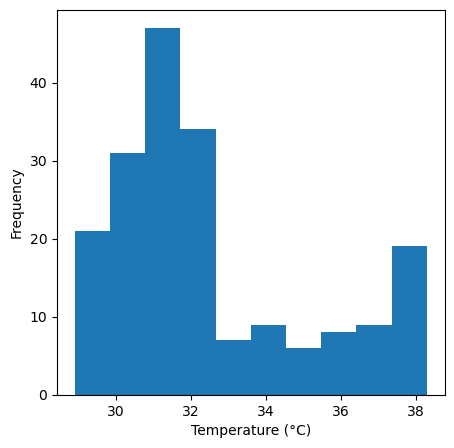

In [182]:
Monday_temperatures = [Monday_23, Monday_30] 
temps = []

for i in Monday_temperatures:
    for temp in i["Temperature (°C)"]:
        temps.append(temp)

plt.figure(figsize=(5, 5))
plt.hist(temps)

plt.xlabel("Temperature (°C)")
plt.ylabel('Frequency')

plt.show() 

In [127]:
Monday_humidity = Monday['Humidity (%)'] 

mean_humidity = Monday_humidity.mean()
median_humidity = Monday_humidity.median()
mode_humidity = Monday_humidity.mode().values[0]

statistics_df = pd.DataFrame({
    'Metric': ['Mean Temperature', 'Median Temperature', 'Mode Temperature'],
    'Value': [mean_humidity, median_humidity, mode_humidity]
})
print(statistics_df)

               Metric      Value
0    Mean Temperature  64.536126
1  Median Temperature  67.200000
2    Mode Temperature  70.200000


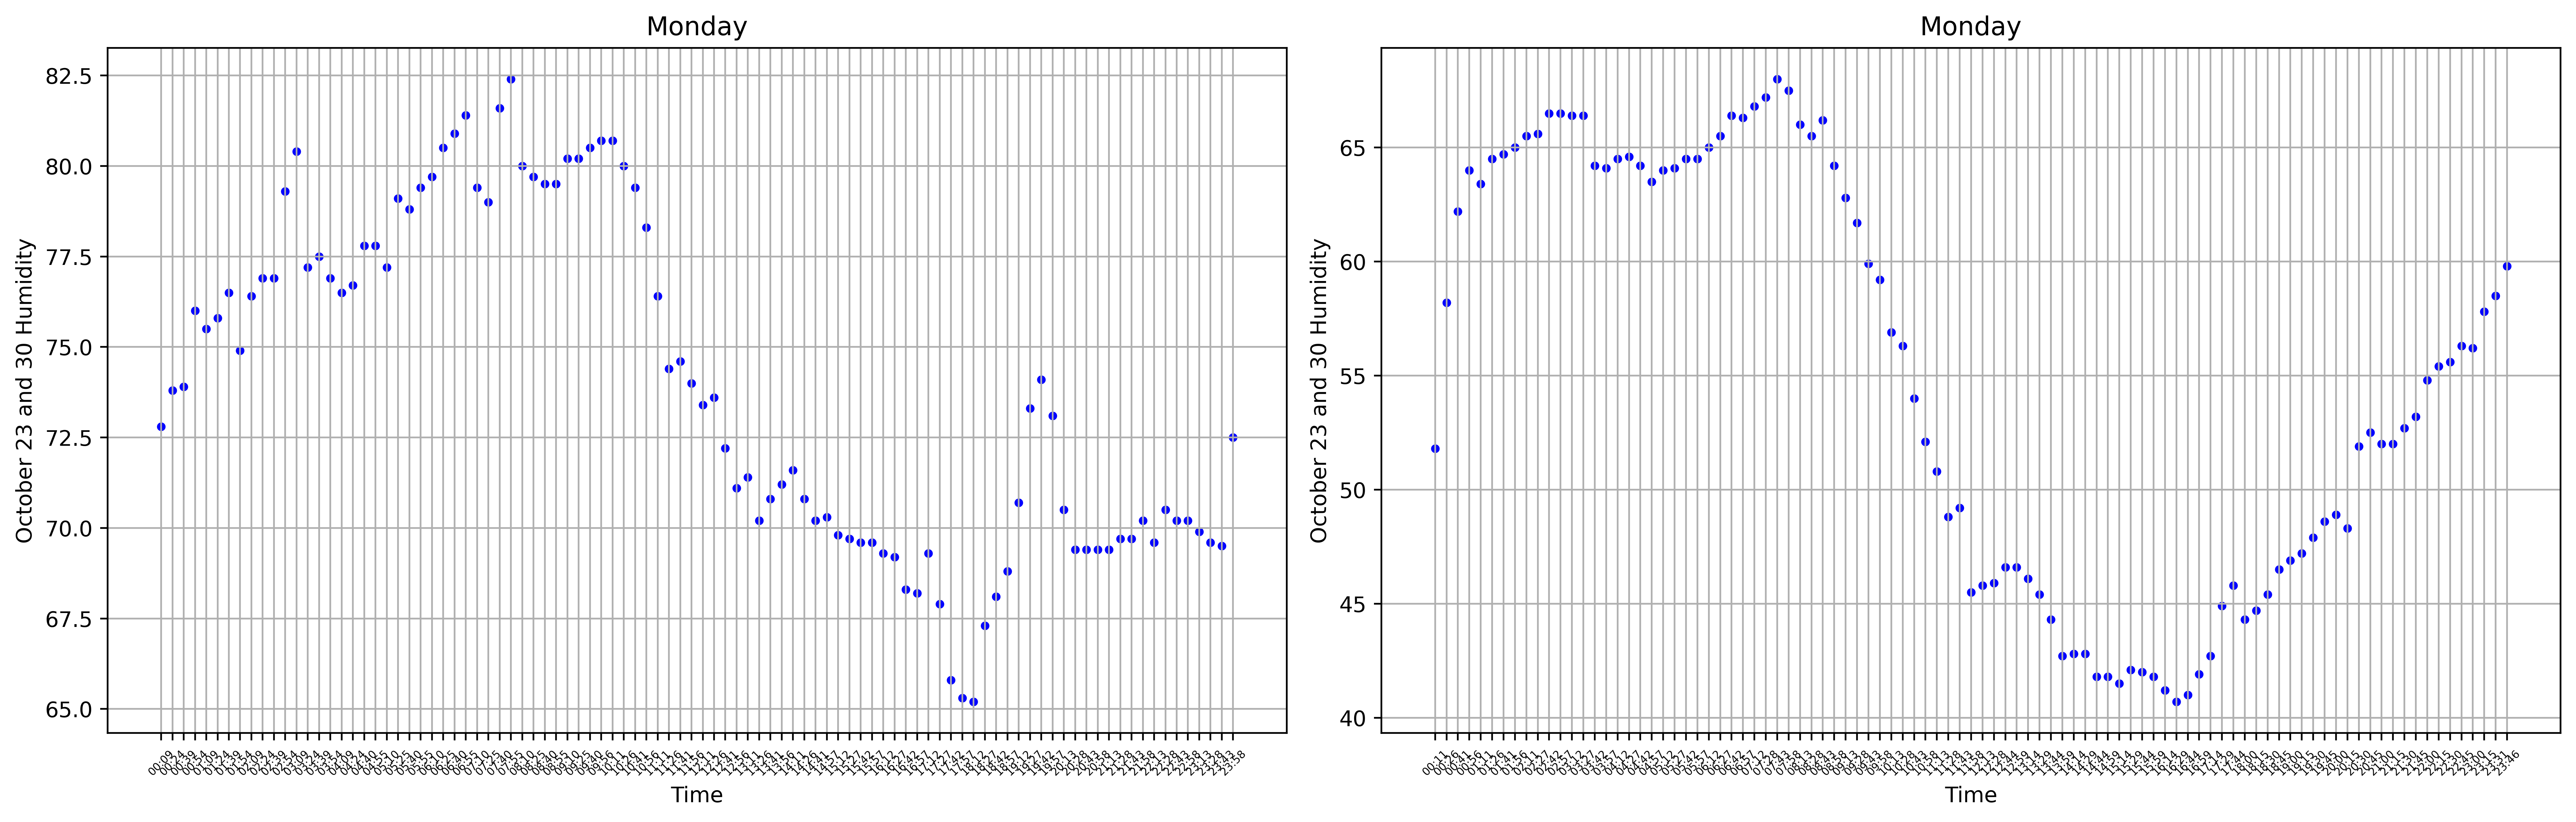

In [128]:
Monday_humidity = [Monday_23, Monday_30] 
plt.figure(figsize=(25, 10), dpi=500)
position = 1
tempIndex = 0

for MondayComb in Monday_humidity:
    plt.subplot(2, 3, position)
    timestamps = MondayComb['Time']
    humidity = MondayComb['Humidity (%)']

    time_labels = [t.strftime('%H:%M') for t in timestamps]

    plt.scatter(time_labels, humidity, marker='.', color='blue')
    plt.title("Monday")
    plt.xlabel("Time")
    plt.ylabel("October 23 and 30 Humidity")
    plt.xticks(rotation=45, fontsize=5) 
    plt.grid()

    position += 1
    tempIndex += 1

plt.tight_layout()  
plt.show()

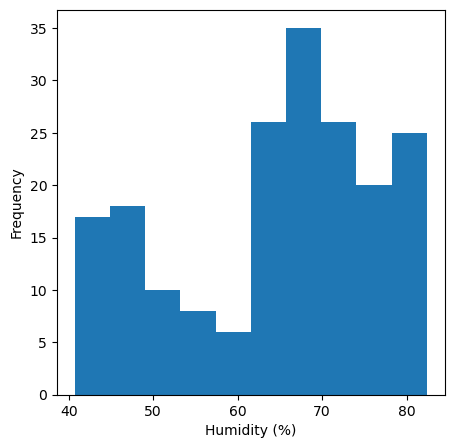

In [183]:
Monday_humidity = [Monday_23, Monday_30] 
temps = []

for i in Monday_humidity:
    for temp in i["Humidity (%)"]:
        temps.append(temp)

plt.figure(figsize=(5, 5))
plt.hist(temps)

plt.xlabel("Humidity (%)")
plt.ylabel('Frequency')

plt.show() 

In [133]:
datetemphumiDF['Date'] = pd.to_datetime(datetemphumiDF['Date'], format='%m/%d/%Y_%H:%M:%S')
datetemphumiDF['Time'] = datetemphumiDF['Date'].dt.time
Tuesday_17 = datetemphumiDF[datetemphumiDF['Day'] == '17']
Tuesday_24 = datetemphumiDF[datetemphumiDF['Day'] == '24']
Tuesday_31 = datetemphumiDF[datetemphumiDF['Day'] == '31']
print("Tuesday 17")
print(Tuesday_17[['Time', 'Temperature (°C)', 'Humidity (%)']])

print("Tuesday 24")
print(Tuesday_24[['Time', 'Temperature (°C)', 'Humidity (%)']])

print("Tuesday 31")
print(Tuesday_31[['Time', 'Temperature (°C)', 'Humidity (%)']])

Tuesday 17
        Time  Temperature (°C)  Humidity (%)
0   20:26:35         32.600000          66.1
1   20:41:37         32.600000          66.0
2   20:56:40         34.800000          61.1
3   21:11:43         35.200000          59.5
4   21:26:46         33.700000          61.5
5   21:41:49         35.200000          59.7
6   21:56:51         34.300000          60.2
7   22:11:54         34.700000          60.4
8   22:26:57         34.800000          61.3
9   22:41:55         34.311111          62.5
10  22:56:57         33.822222          63.7
11  23:11:59         33.333333          64.9
12  23:26:49         32.844444          66.1
13  23:41:51         32.355556          67.3
14  23:56:55         31.866667          68.5
Tuesday 24
         Time  Temperature (°C)  Humidity (%)
581  00:13:50              30.3          74.8
582  00:28:52              29.9          75.5
583  00:43:54              29.7          76.6
584  00:58:57              29.5          78.0
585  01:14:00              2

In [134]:
Tuesday = datetemphumiDF[(datetemphumiDF['Day'] == '17') | (datetemphumiDF['Day'] == '24') | (datetemphumiDF['Day'] == '31')]

print("Tuesday")
print(Tuesday)

Tuesday
                    Date  Humidity (%)  Temperature (°C) Month Day  \
0    2023-10-17 20:26:35          66.1              32.6    10  17   
1    2023-10-17 20:41:37          66.0              32.6    10  17   
2    2023-10-17 20:56:40          61.1              34.8    10  17   
3    2023-10-17 21:11:43          59.5              35.2    10  17   
4    2023-10-17 21:26:46          61.5              33.7    10  17   
...                  ...           ...               ...   ...  ..   
1341 2023-10-31 22:50:26          52.1              33.7    10  31   
1342 2023-10-31 23:05:29          49.0              33.8    10  31   
1343 2023-10-31 23:20:31          48.7              33.1    10  31   
1344 2023-10-31 23:35:34          47.3              34.8    10  31   
1345 2023-10-31 23:50:37          46.8              34.9    10  31   

               Year      Time  
0     2023_20:26:35  20:26:35  
1     2023_20:41:37  20:41:37  
2     2023_20:56:40  20:56:40  
3     2023_21:11:43  21

In [135]:
Tuesday_temperatures = Tuesday['Temperature (°C)']

mean_temperature = Tuesday_temperatures.mean()
median_temperature = Tuesday_temperatures.median()
mode_temperature = Tuesday_temperatures.mode().values[0]

temperature_statistics_df = pd.DataFrame({
    'Metric': ['Mean Temperature', 'Median Temperature', 'Mode Temperature'],
    'Value': [mean_temperature, median_temperature, mode_temperature]
})
print(temperature_statistics_df)

               Metric      Value
0    Mean Temperature  33.351618
1  Median Temperature  32.900000
2    Mode Temperature  33.400000


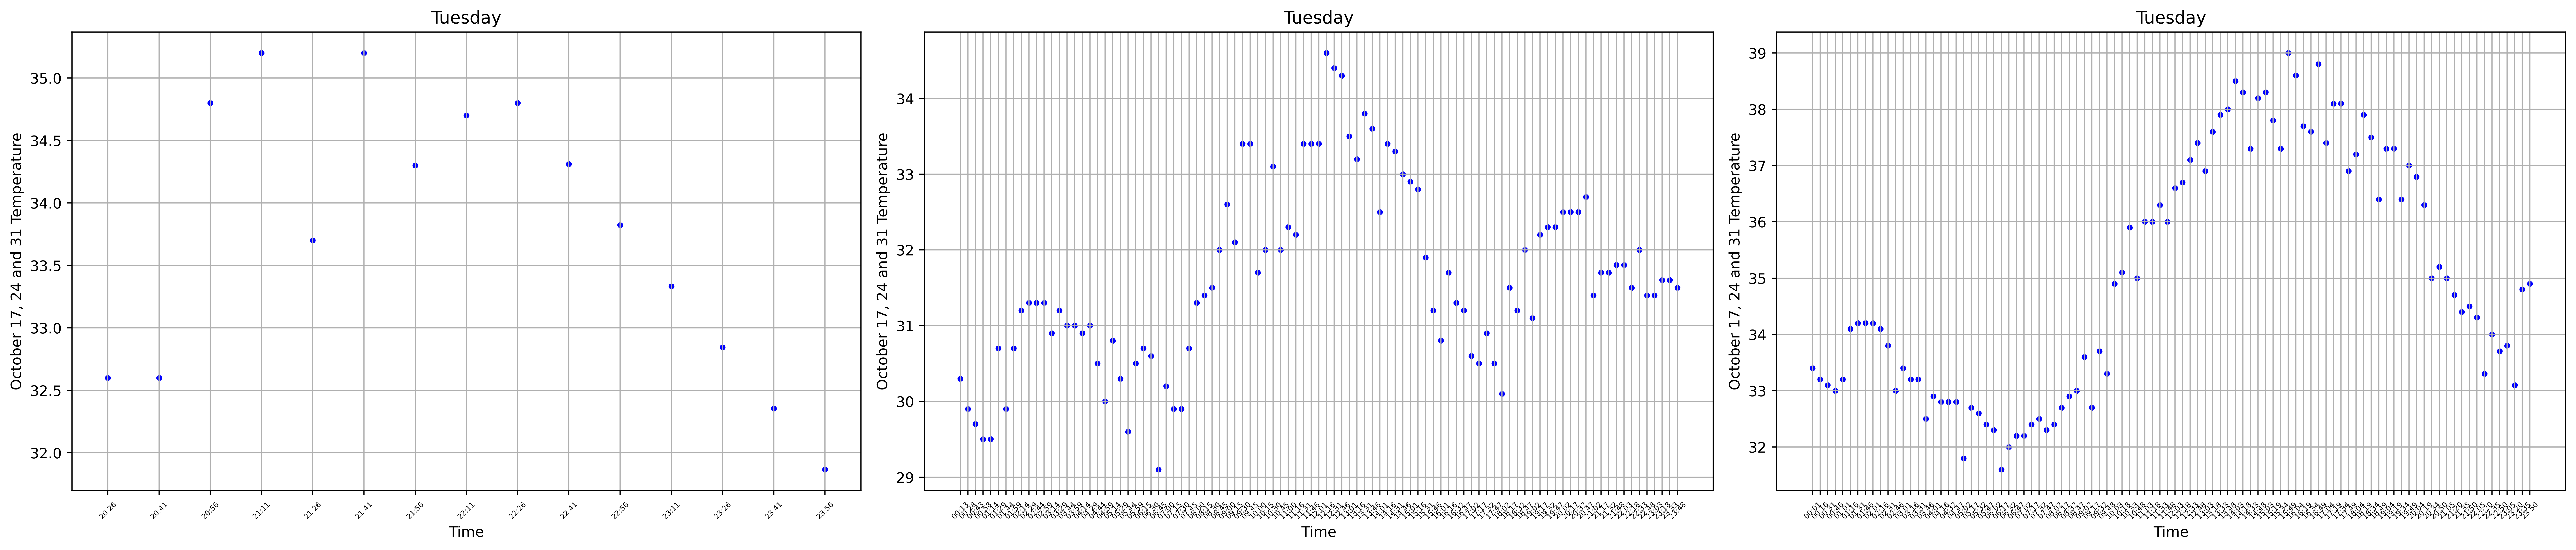

In [136]:
Tuesday_temperatures = [Tuesday_17, Tuesday_24, Tuesday_31] 
plt.figure(figsize=(25, 10), dpi=500)
position = 1
tempIndex = 0

for TuesdayComb in Tuesday_temperatures:
    plt.subplot(2, 3, position)
    timestamps = TuesdayComb['Time']
    temperatures = TuesdayComb['Temperature (°C)']

    time_labels = [t.strftime('%H:%M') for t in timestamps]

    plt.scatter(time_labels, temperatures, marker='.', color='blue')
    plt.title("Tuesday")
    plt.xlabel("Time")
    plt.ylabel("October 17, 24 and 31 Temperature")
    plt.xticks(rotation=45, fontsize=5) 
    plt.grid()

    position += 1
    tempIndex += 1

plt.tight_layout()  
plt.show()

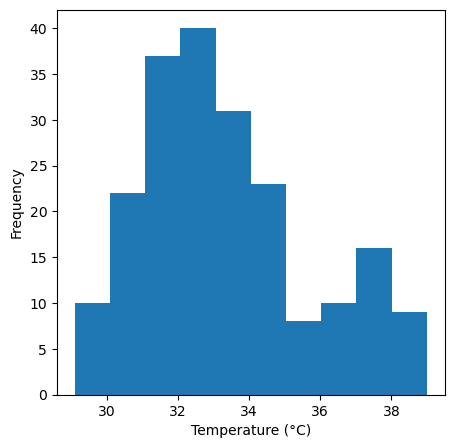

In [188]:
Tuesday_temperatures = [Tuesday_17, Tuesday_24, Tuesday_31] 
temps = []

for i in Tuesday_temperatures:
    for temp in i["Temperature (°C)"]:
        temps.append(temp)

plt.figure(figsize=(5, 5))
plt.hist(temps)

plt.xlabel("Temperature (°C)")
plt.ylabel('Frequency')

plt.show() 

In [137]:
Tuesday_humidity = Tuesday['Humidity (%)'] 

mean_humidity = Tuesday_humidity.mean()
median_humidity = Tuesday_humidity.median()
mode_humidity = Tuesday_humidity.mode().values[0]

statistics_df = pd.DataFrame({
    'Metric': ['Mean Temperature', 'Median Temperature', 'Mode Temperature'],
    'Value': [mean_humidity, median_humidity, mode_humidity]
})
print(statistics_df)

               Metric      Value
0    Mean Temperature  58.733981
1  Median Temperature  59.650000
2    Mode Temperature  51.900000


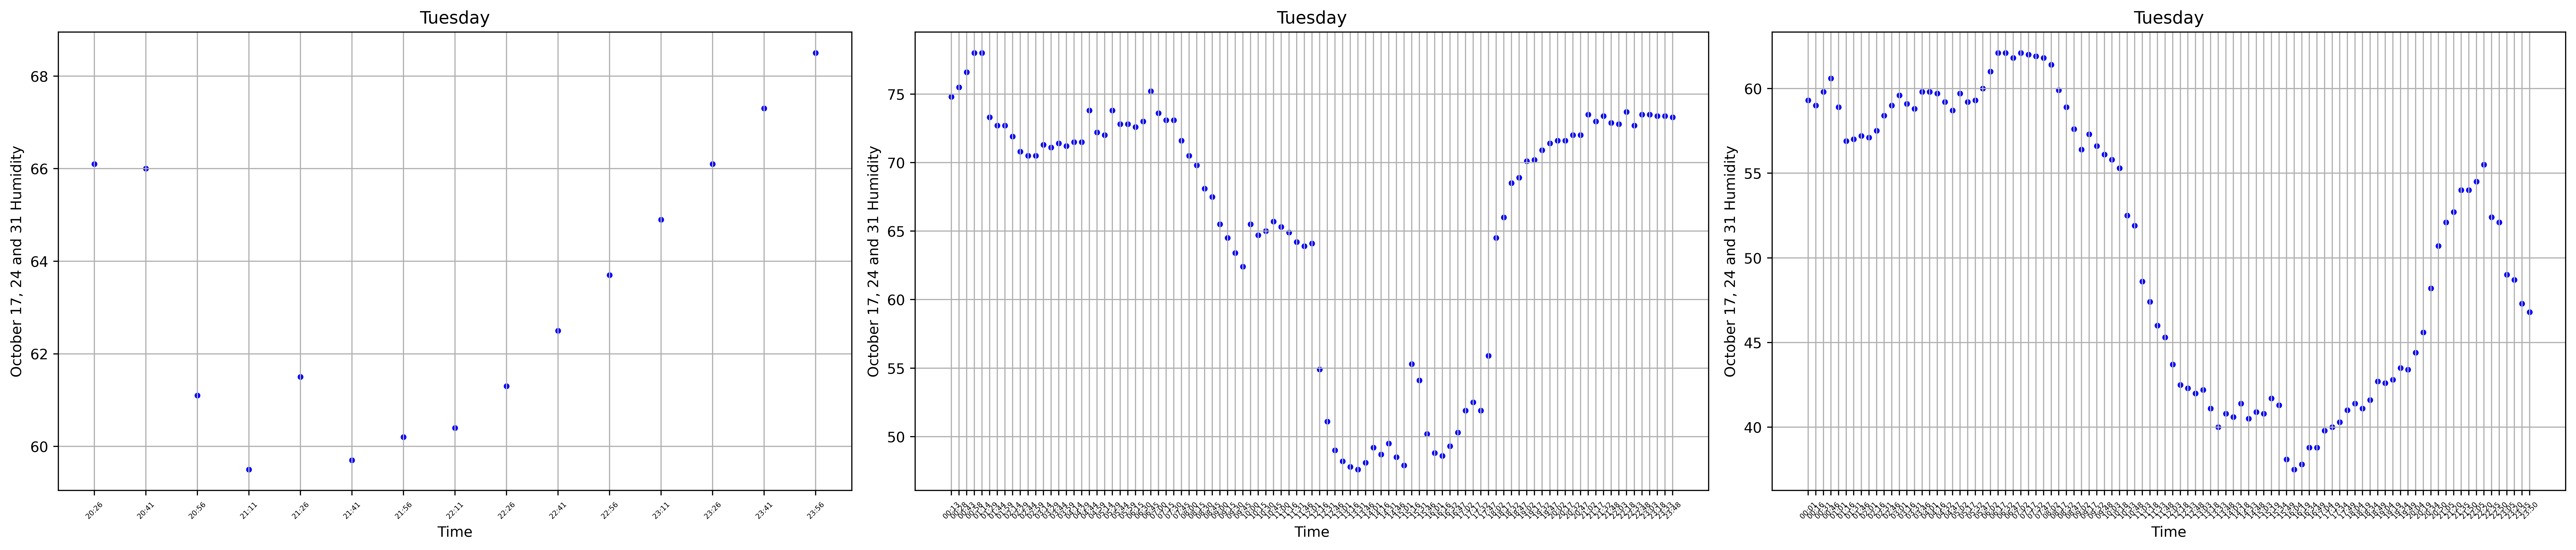

In [138]:
Tuesday_humidity = [Tuesday_17, Tuesday_24, Tuesday_31] 
plt.figure(figsize=(25, 10), dpi=500)
position = 1
tempIndex = 0

for TuesdayComb in Tuesday_humidity:
    plt.subplot(2, 3, position)
    timestamps = TuesdayComb['Time']
    humidity = TuesdayComb['Humidity (%)']

    time_labels = [t.strftime('%H:%M') for t in timestamps]

    plt.scatter(time_labels, humidity, marker='.', color='blue')
    plt.title("Tuesday")
    plt.xlabel("Time")
    plt.ylabel("October 17, 24 and 31 Humidity")
    plt.xticks(rotation=45, fontsize=5) 
    plt.grid()

    position += 1
    tempIndex += 1

plt.tight_layout()  
plt.show()

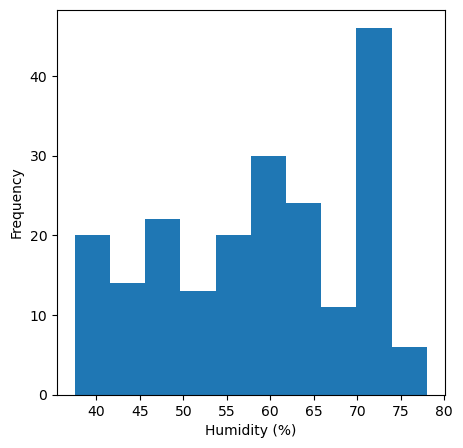

In [189]:
Tuesday_humidity = [Tuesday_17, Tuesday_24, Tuesday_31] 
temps = []

for i in Tuesday_humidity:
    for temp in i["Humidity (%)"]:
        temps.append(temp)

plt.figure(figsize=(5, 5))
plt.hist(temps)

plt.xlabel("Humidity (%)")
plt.ylabel('Frequency')

plt.show() 

In [139]:
datetemphumiDF['Date'] = pd.to_datetime(datetemphumiDF['Date'], format='%m/%d/%Y_%H:%M:%S')
datetemphumiDF['Time'] = datetemphumiDF['Date'].dt.time
Wednesday_18 = datetemphumiDF[datetemphumiDF['Day'] == '18']
Wednesday_25 = datetemphumiDF[datetemphumiDF['Day'] == '25']

print("Wednesday 18")
print(Wednesday_18[['Time', 'Temperature (°C)', 'Humidity (%)']])

print("Wednesday 25")
print(Wednesday_25[['Time', 'Temperature (°C)', 'Humidity (%)']])

Wednesday 18
         Time  Temperature (°C)  Humidity (%)
15   00:11:13         31.377778          69.7
16   00:26:15         30.888889          70.9
17   00:31:13         30.400000          72.1
18   00:46:15         30.400000          72.1
19   01:01:18         32.000000          68.6
..        ...               ...           ...
106  22:50:09         32.700000          70.6
107  23:05:12         32.500000          72.0
108  23:20:15         31.200000          72.6
109  23:35:17         31.800000          72.8
110  23:50:20         31.000000          73.4

[96 rows x 3 columns]
Wednesday 25
         Time  Temperature (°C)  Humidity (%)
676  00:03:30              31.5          72.9
677  00:18:34              31.3          73.3
678  00:33:37              31.3          73.5
679  00:48:40              31.3          73.5
680  01:03:43              31.2          73.8
..        ...               ...           ...
767  22:52:56              32.0          67.2
768  23:07:58              31.8

In [140]:
Wednesday = datetemphumiDF[(datetemphumiDF['Day'] == '18') | (datetemphumiDF['Day'] == '25')]

print("Wednesday")
print(Wednesday)

Wednesday
                   Date  Humidity (%)  Temperature (°C) Month Day  \
15  2023-10-18 00:11:13          69.7         31.377778    10  18   
16  2023-10-18 00:26:15          70.9         30.888889    10  18   
17  2023-10-18 00:31:13          72.1         30.400000    10  18   
18  2023-10-18 00:46:15          72.1         30.400000    10  18   
19  2023-10-18 01:01:18          68.6         32.000000    10  18   
..                  ...           ...               ...   ...  ..   
767 2023-10-25 22:52:56          67.2         32.000000    10  25   
768 2023-10-25 23:07:58          68.5         31.800000    10  25   
769 2023-10-25 23:23:02          70.5         30.600000    10  25   
770 2023-10-25 23:38:05          70.1         31.200000    10  25   
771 2023-10-25 23:53:09          70.7         31.300000    10  25   

              Year      Time  
15   2023_00:11:13  00:11:13  
16   2023_00:26:15  00:26:15  
17   2023_00:31:13  00:31:13  
18   2023_00:46:15  00:46:15  
19   2

In [142]:
Wednesday_temperatures = Wednesday['Temperature (°C)']

mean_temperature = Wednesday_temperatures.mean()
median_temperature = Wednesday_temperatures.median()
mode_temperature = Wednesday_temperatures.mode().values[0]

temperature_statistics_df = pd.DataFrame({
    'Metric': ['Mean Temperature', 'Median Temperature', 'Mode Temperature'],
    'Value': [mean_temperature, median_temperature, mode_temperature]
})
print(temperature_statistics_df)

               Metric      Value
0    Mean Temperature  33.354514
1  Median Temperature  33.000000
2    Mode Temperature  31.700000


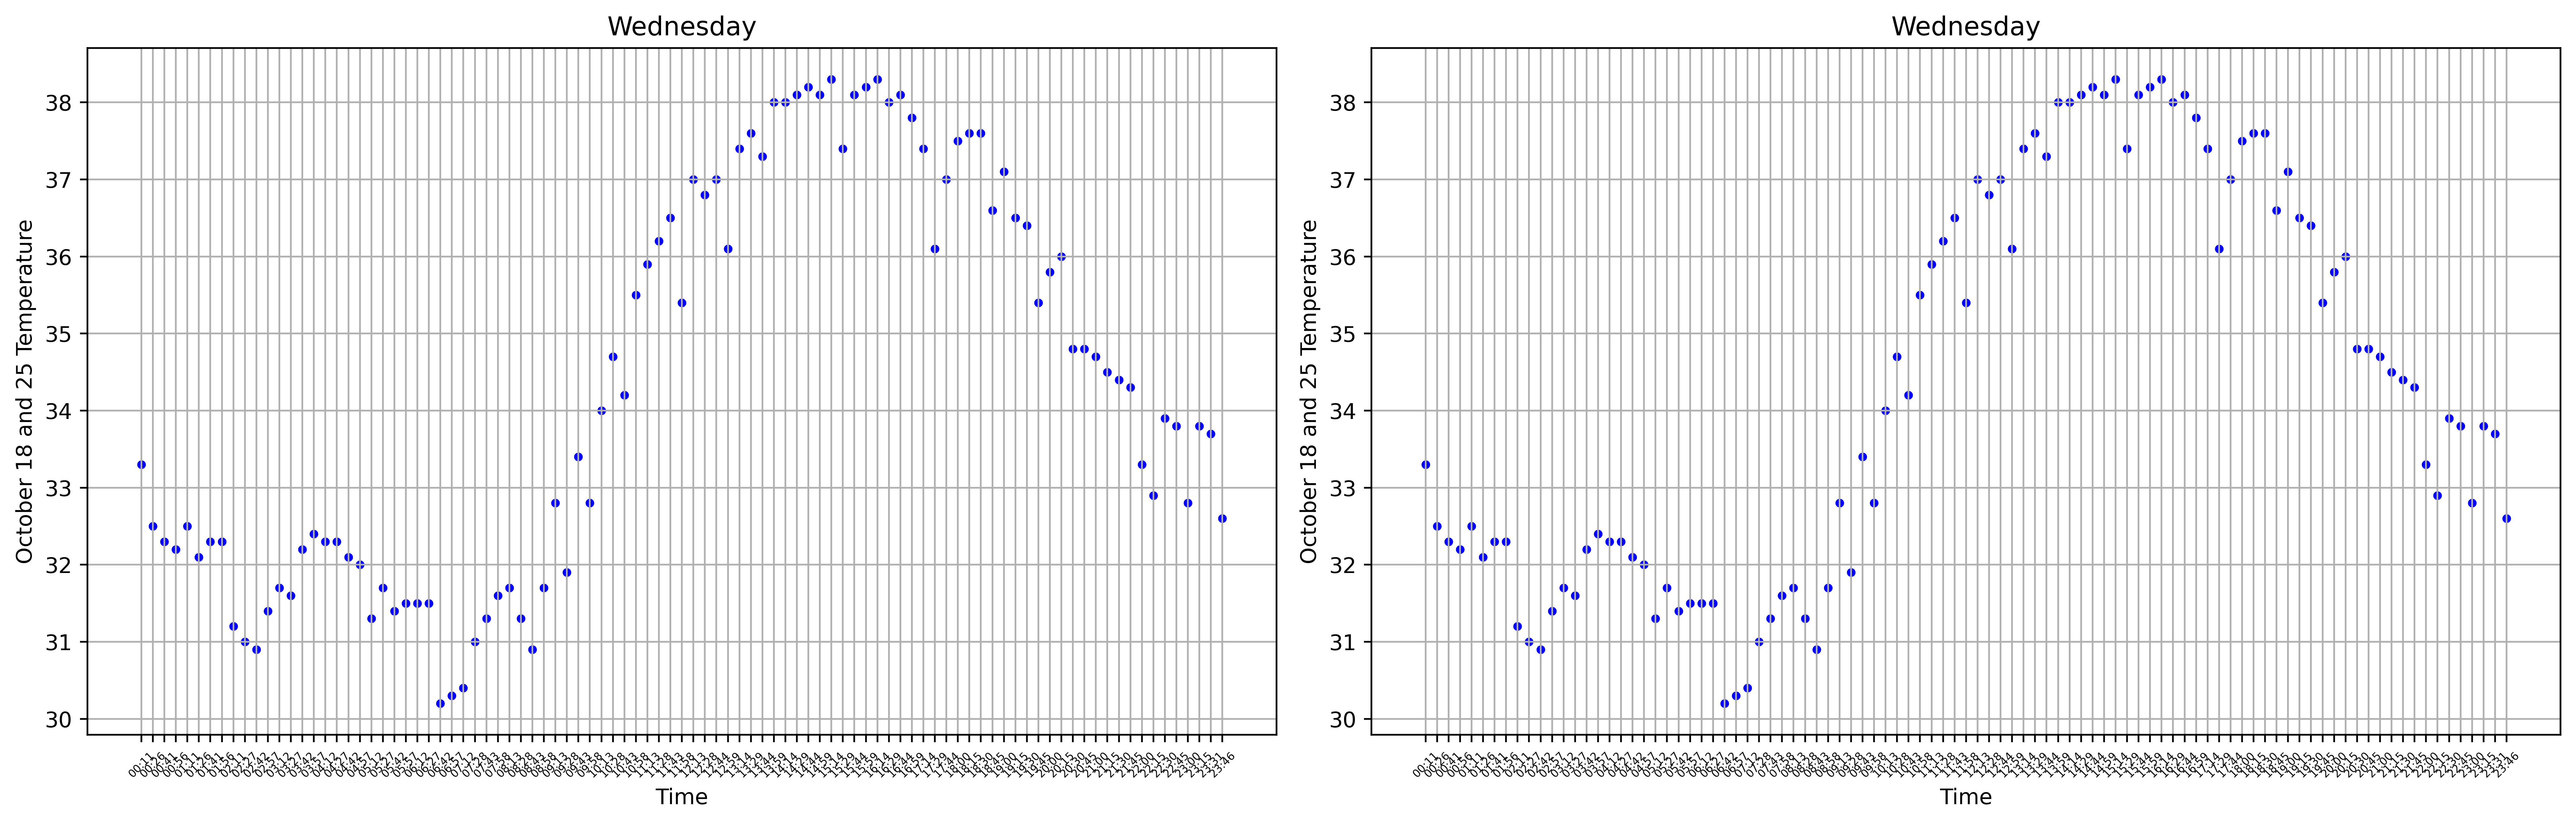

In [143]:
Wednesday_temperatures = [Wednesday_18, Wednesday_25] 
plt.figure(figsize=(25, 10), dpi=500)
position = 1
tempIndex = 0

for WednesdayComb in Wednesday_temperatures:
    plt.subplot(2, 3, position)
    timestamps = MondayComb['Time']
    temperatures = MondayComb['Temperature (°C)']

    time_labels = [t.strftime('%H:%M') for t in timestamps]

    plt.scatter(time_labels, temperatures, marker='.', color='blue')
    plt.title("Wednesday")
    plt.xlabel("Time")
    plt.ylabel("October 18 and 25 Temperature")
    plt.xticks(rotation=45, fontsize=5) 
    plt.grid()

    position += 1
    tempIndex += 1

plt.tight_layout()  
plt.show()

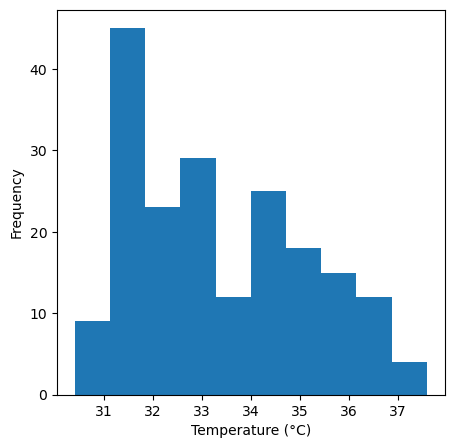

In [190]:
Wednesday_temperatures = [Wednesday_18, Wednesday_25] 
temps = []

for i in Wednesday_temperatures:
    for temp in i["Temperature (°C)"]:
        temps.append(temp)

plt.figure(figsize=(5, 5))
plt.hist(temps)

plt.xlabel("Temperature (°C)")
plt.ylabel('Frequency')

plt.show() 

In [144]:
Wednesday_humidity = Wednesday['Humidity (%)'] 

mean_humidity = Wednesday_humidity.mean()
median_humidity = Wednesday_humidity.median()
mode_humidity = Wednesday_humidity.mode().values[0]

statistics_df = pd.DataFrame({
    'Metric': ['Mean Temperature', 'Median Temperature', 'Mode Temperature'],
    'Value': [mean_humidity, median_humidity, mode_humidity]
})
print(statistics_df)

               Metric      Value
0    Mean Temperature  64.598958
1  Median Temperature  67.150000
2    Mode Temperature  58.800000


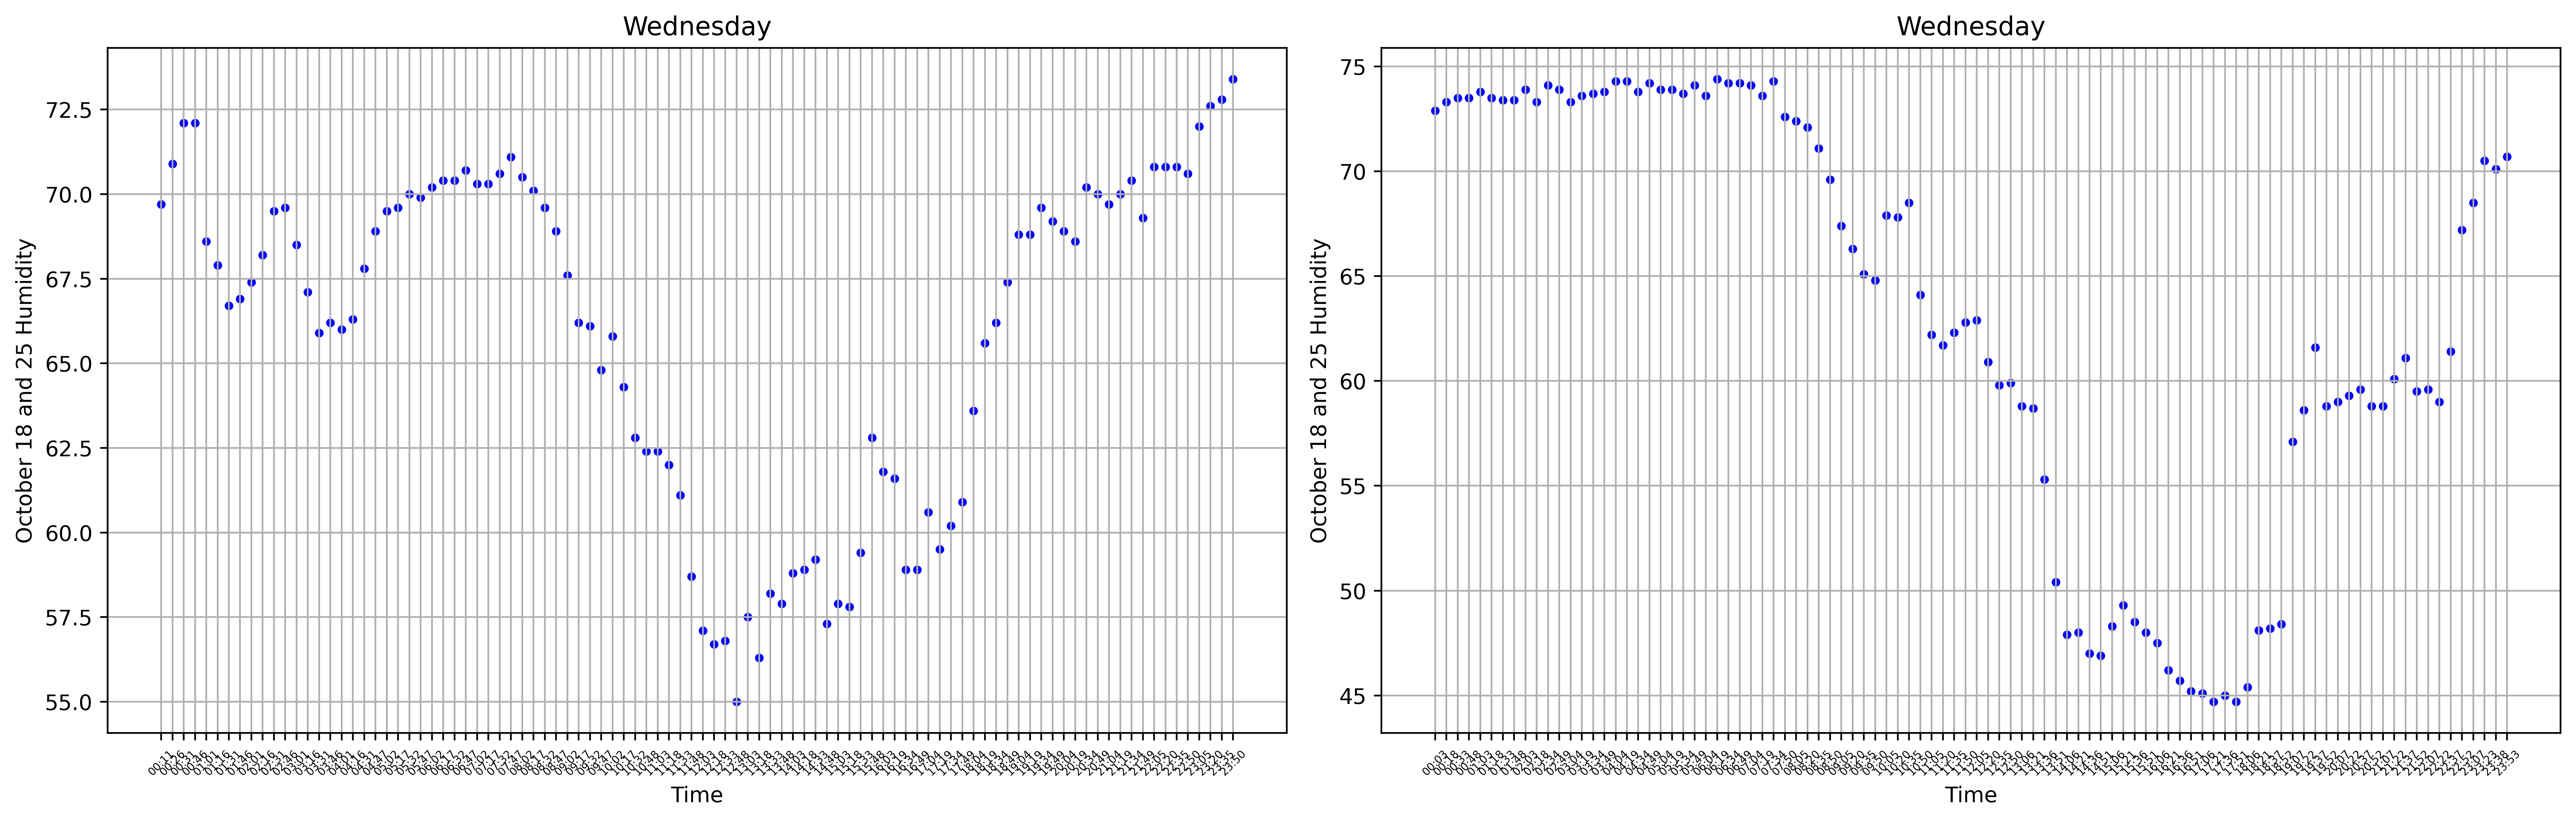

In [145]:
Wednesday_humidity = [Wednesday_18, Wednesday_25] 
plt.figure(figsize=(25, 10), dpi=500)
position = 1
tempIndex = 0

for WednesdayComb in Wednesday_humidity:
    plt.subplot(2, 3, position)
    timestamps = WednesdayComb['Time']
    humidity = WednesdayComb['Humidity (%)']

    time_labels = [t.strftime('%H:%M') for t in timestamps]

    plt.scatter(time_labels, humidity, marker='.', color='blue')
    plt.title("Wednesday")
    plt.xlabel("Time")
    plt.ylabel("October 18 and 25 Humidity")
    plt.xticks(rotation=45, fontsize=5) 
    plt.grid()

    position += 1
    tempIndex += 1

plt.tight_layout()  
plt.show()

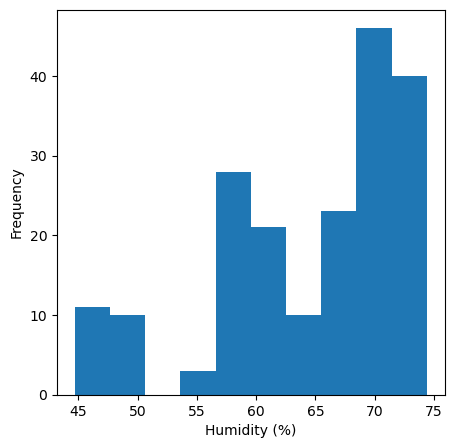

In [191]:
Wednesday_humidity = [Wednesday_18, Wednesday_25] 
temps = []

for i in Wednesday_humidity:
    for temp in i["Humidity (%)"]:
        temps.append(temp)

plt.figure(figsize=(5, 5))
plt.hist(temps)

plt.xlabel("Humidity (%)")
plt.ylabel('Frequency')

plt.show() 

In [146]:
datetemphumiDF['Date'] = pd.to_datetime(datetemphumiDF['Date'], format='%m/%d/%Y_%H:%M:%S')
datetemphumiDF['Time'] = datetemphumiDF['Date'].dt.time
Thursday_19 = datetemphumiDF[datetemphumiDF['Day'] == '18']
Thursday_26 = datetemphumiDF[datetemphumiDF['Day'] == '26']

print("Thursday 19")
print(Thursday_19[['Time', 'Temperature (°C)', 'Humidity (%)']])

print("Thursday 26")
print(Thursday_26[['Time', 'Temperature (°C)', 'Humidity (%)']])

Thursday 19
         Time  Temperature (°C)  Humidity (%)
15   00:11:13         31.377778          69.7
16   00:26:15         30.888889          70.9
17   00:31:13         30.400000          72.1
18   00:46:15         30.400000          72.1
19   01:01:18         32.000000          68.6
..        ...               ...           ...
106  22:50:09         32.700000          70.6
107  23:05:12         32.500000          72.0
108  23:20:15         31.200000          72.6
109  23:35:17         31.800000          72.8
110  23:50:20         31.000000          73.4

[96 rows x 3 columns]
Thursday 26
         Time  Temperature (°C)  Humidity (%)
772  00:08:12              31.6          70.3
773  00:23:15              32.6          66.6
774  00:38:17              32.3          67.8
775  00:53:21              32.1          68.5
776  01:08:23              30.9          69.5
..        ...               ...           ...
863  22:57:52              34.4          59.5
864  23:12:55              33.2  

In [147]:
Thursday = datetemphumiDF[(datetemphumiDF['Day'] == '19') | (datetemphumiDF['Day'] == '26')]

print("Thursday")
print(Thursday)

Thursday
                   Date  Humidity (%)  Temperature (°C) Month Day  \
111 2023-10-19 00:05:24          72.4              31.3    10  19   
112 2023-10-19 00:20:26          73.8              31.9    10  19   
113 2023-10-19 00:35:29          74.5              31.1    10  19   
114 2023-10-19 00:50:31          73.1              31.8    10  19   
115 2023-10-19 01:05:34          74.6              30.7    10  19   
..                  ...           ...               ...   ...  ..   
863 2023-10-26 22:57:52          59.5              34.4    10  26   
864 2023-10-26 23:12:55          60.6              33.2    10  26   
865 2023-10-26 23:27:57          63.1              32.8    10  26   
866 2023-10-26 23:43:00          62.8              32.8    10  26   
867 2023-10-26 23:58:03          63.1              31.9    10  26   

              Year      Time  
111  2023_00:05:24  00:05:24  
112  2023_00:20:26  00:20:26  
113  2023_00:35:29  00:35:29  
114  2023_00:50:31  00:50:31  
115  20

In [148]:
Thursday_temperatures = Thursday['Temperature (°C)']

mean_temperature = Thursday_temperatures.mean()
median_temperature = Thursday_temperatures.median()
mode_temperature = Thursday_temperatures.mode().values[0]

temperature_statistics_df = pd.DataFrame({
    'Metric': ['Mean Temperature', 'Median Temperature', 'Mode Temperature'],
    'Value': [mean_temperature, median_temperature, mode_temperature]
})
print(temperature_statistics_df)

               Metric      Value
0    Mean Temperature  31.869792
1  Median Temperature  31.700000
2    Mode Temperature  32.000000


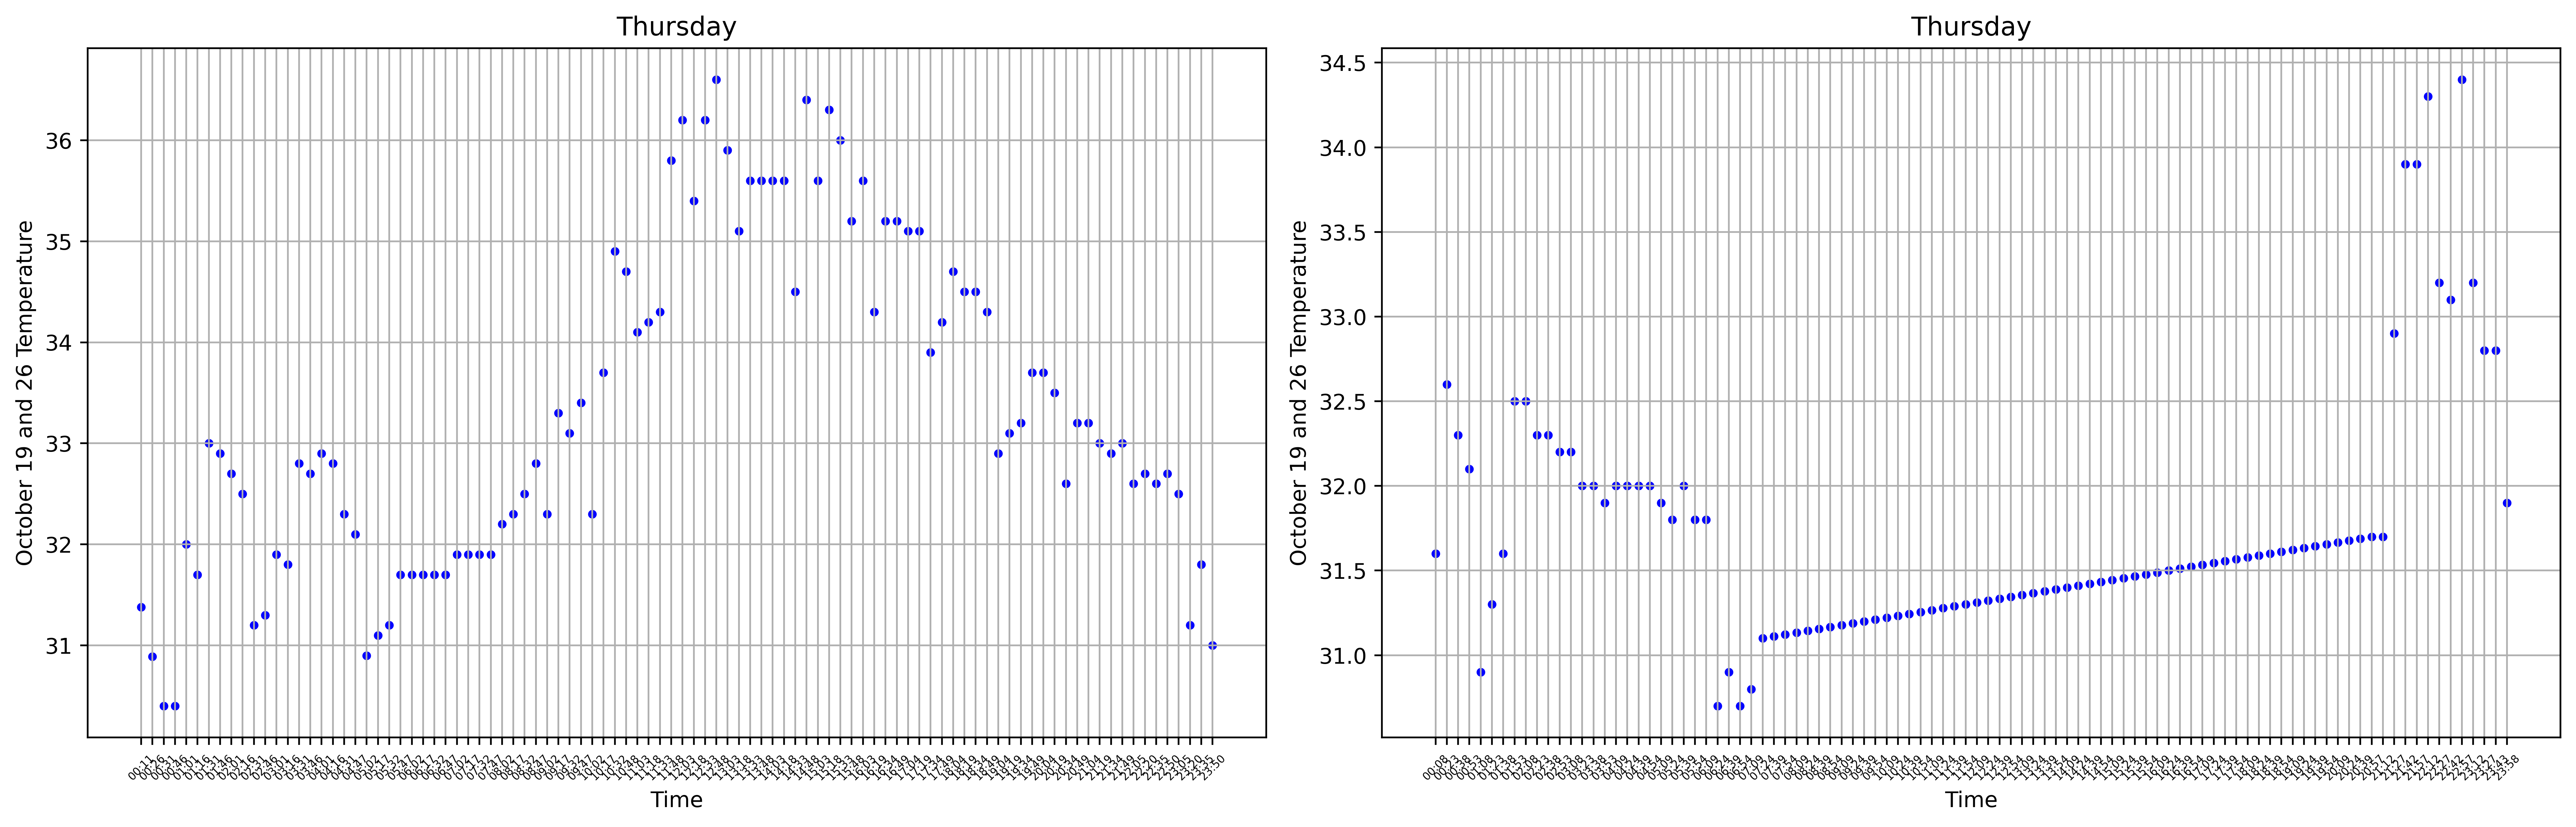

In [149]:
Thursday_temperatures = [Thursday_19, Thursday_26] 
plt.figure(figsize=(25, 10), dpi=500)
position = 1
tempIndex = 0

for ThursdayComb in Thursday_temperatures:
    plt.subplot(2, 3, position)
    timestamps = ThursdayComb['Time']
    temperatures = ThursdayComb['Temperature (°C)']

    time_labels = [t.strftime('%H:%M') for t in timestamps]

    plt.scatter(time_labels, temperatures, marker='.', color='blue')
    plt.title("Thursday")
    plt.xlabel("Time")
    plt.ylabel("October 19 and 26 Temperature")
    plt.xticks(rotation=45, fontsize=5) 
    plt.grid()

    position += 1
    tempIndex += 1

plt.tight_layout()  
plt.show()

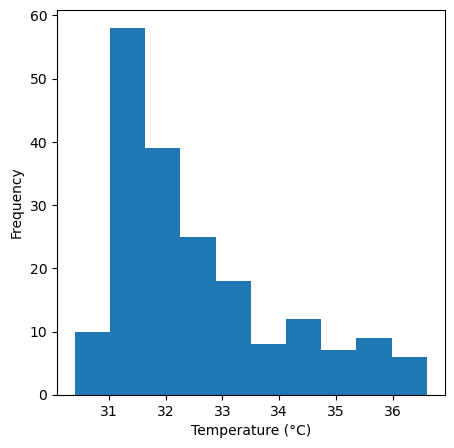

In [192]:
Thursday_temperatures = [Thursday_19, Thursday_26] 
temps = []

for i in Thursday_temperatures:
    for temp in i["Temperature (°C)"]:
        temps.append(temp)

plt.figure(figsize=(5, 5))
plt.hist(temps)

plt.xlabel("Temperature (°C)")
plt.ylabel('Frequency')

plt.show() 

In [150]:
Thursday_humidity = Thursday['Humidity (%)'] 

mean_humidity = Thursday_humidity.mean()
median_humidity = Thursday_humidity.median()
mode_humidity = Thursday_humidity.mode().values[0]

statistics_df = pd.DataFrame({
    'Metric': ['Mean Temperature', 'Median Temperature', 'Mode Temperature'],
    'Value': [mean_humidity, median_humidity, mode_humidity]
})
print(statistics_df)

               Metric      Value
0    Mean Temperature  69.306250
1  Median Temperature  69.374074
2    Mode Temperature  74.200000


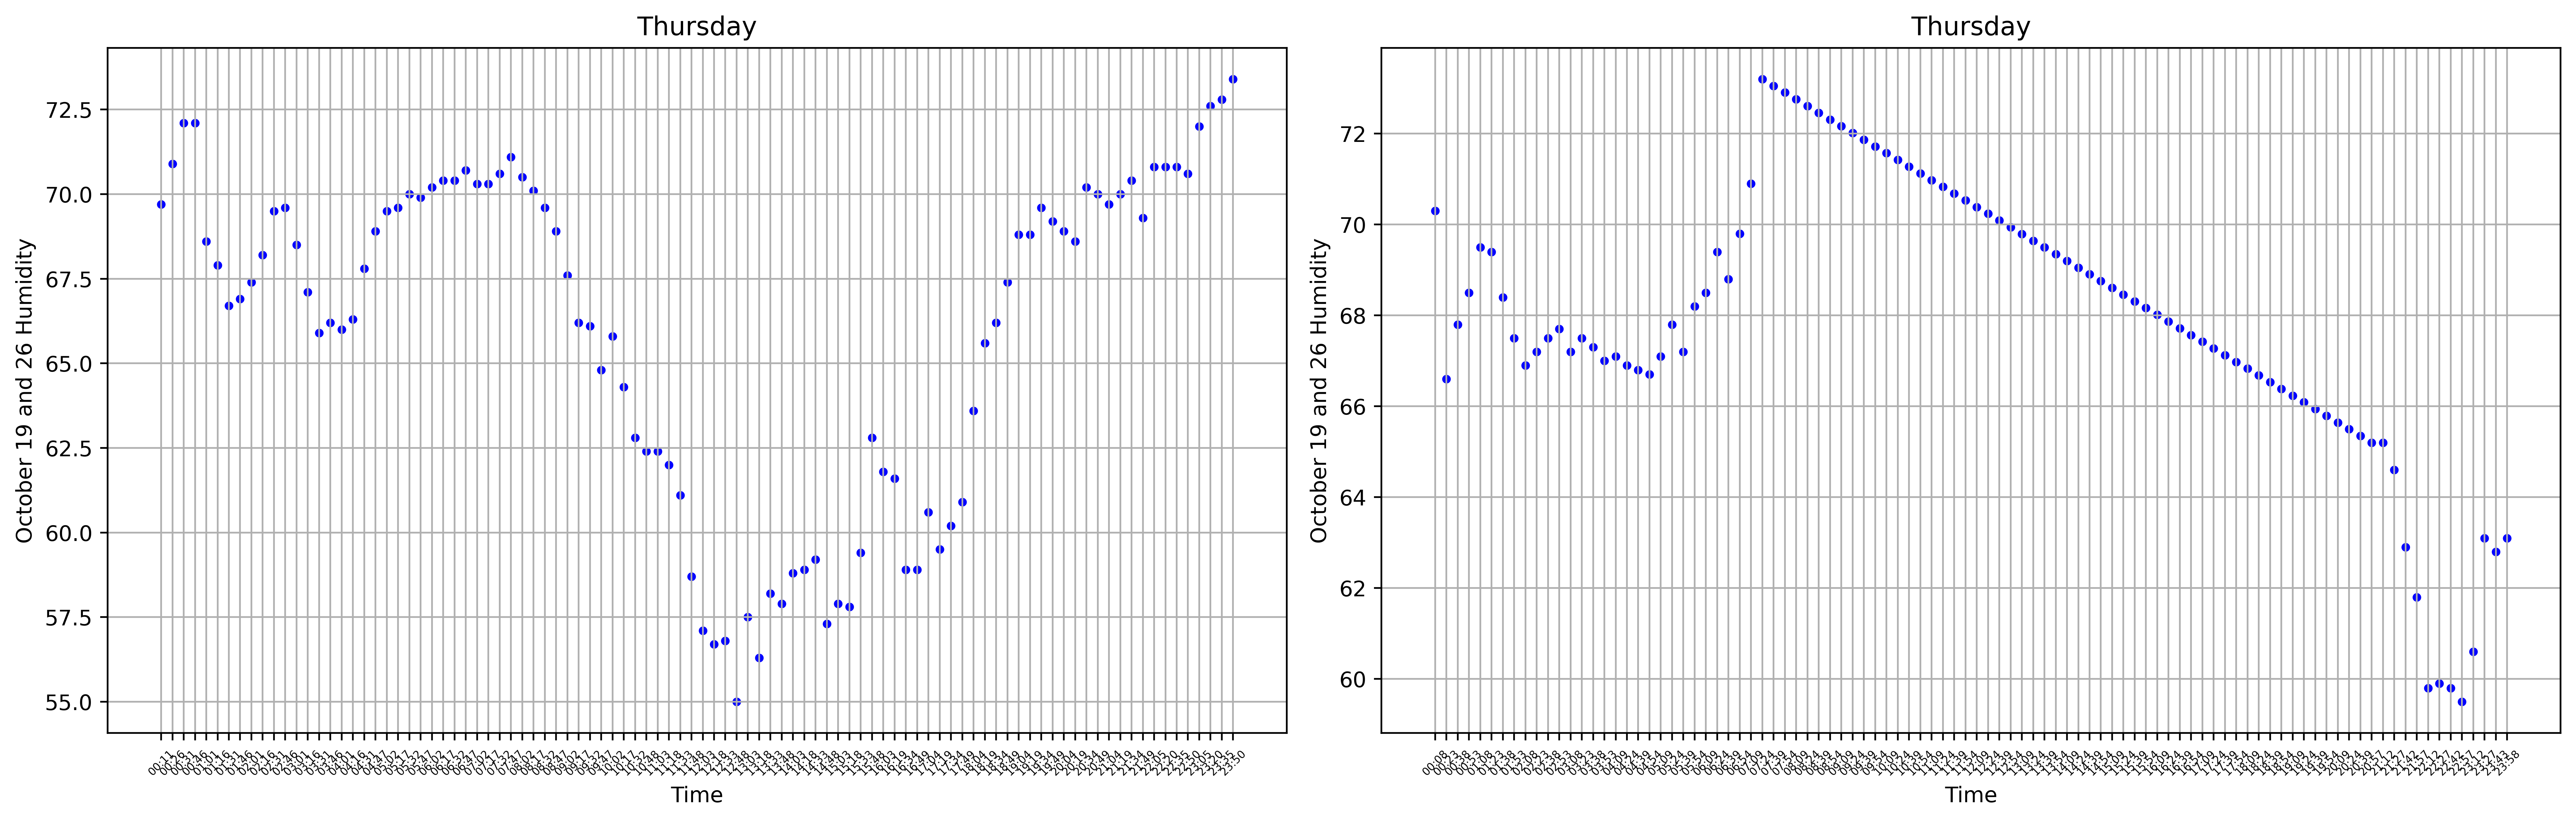

In [151]:
Thursday_humidity = [Thursday_19, Thursday_26] 
plt.figure(figsize=(25, 10), dpi=500)
position = 1
tempIndex = 0

for ThursdayComb in Thursday_humidity:
    plt.subplot(2, 3, position)
    timestamps = ThursdayComb['Time']
    humidity = ThursdayComb['Humidity (%)']

    time_labels = [t.strftime('%H:%M') for t in timestamps]

    plt.scatter(time_labels, humidity, marker='.', color='blue')
    plt.title("Thursday")
    plt.xlabel("Time")
    plt.ylabel("October 19 and 26 Humidity")
    plt.xticks(rotation=45, fontsize=5) 
    plt.grid()

    position += 1
    tempIndex += 1

plt.tight_layout()  
plt.show()

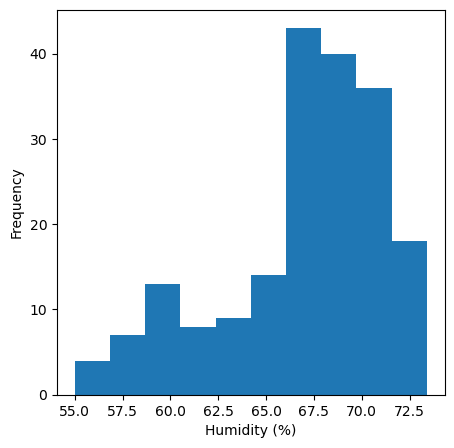

In [193]:
Thursday_humidity = [Thursday_19, Thursday_26] 
temps = []

for i in Thursday_humidity:
    for temp in i["Humidity (%)"]:
        temps.append(temp)

plt.figure(figsize=(5, 5))
plt.hist(temps)

plt.xlabel("Humidity (%)")
plt.ylabel('Frequency')

plt.show() 